Análisis de Componentes Principales (PCA)
=

***dataset: mtcars***

*Se pide generar un modelo que permita predecir las millas por galón, usar componentes principales*

**Autor:** *Futura*

# Librerías
---

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.font_manager
import adjustText as adjT
import plotly.express as px
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import sklearn as sk

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#conexion a MySql
#import mysql.connector as mysql
#import pymysql
import numpy as np
#from sqlalchemy 
#import create_engine
import statsmodels.api as sm

In [3]:
# Read the CSV file
datos = pd.read_csv("D:/Python/Proyectos/datasets/mtcars.csv")

In [4]:
sk.__version__

'1.5.0'

# Datos
---

Los datos fueron extraídos de la revista estadounidense __Motor Trend de 1974__, y comprenden el consumo de combustible y 10 aspectos del diseño y rendimiento del automóvil para 32 automóviles (modelos 1973-74).

Un marco de datos con 32 observaciones sobre 11 variables (numéricas).
<br>
[, 1] __mpg__ Millas/galón
<br>
[, 2] __cyl__ Número de cilindros
<br>
[, 3] __disp__ Mide el volumen del motor y representa el poder que genera el motor
<br>
[, 4] __hp__ Caballos de fuerza brutos
<br>
[, 5] __drat__ Relación del eje trasero
<br>
[, 6] __wt__ Peso (1000 libras)
<br>
[, 7] __qsec__ 1/4 milla de tiempo (Tiempo que se demora el carro en recorrer 1/4 de milla) 
<br>
[, 8] __vs__ Motor (0 = en forma de V, 1 = recto)
<br>
[, 9] __am__ Transmisión (0 = automática, 1 = manual)
<br>
[,10] __gear__ Número de cambios
<br>
[,11] __carb__ Número de carburadores

In [5]:
datos = datos.rename(columns={'model': 'modelo', 'mpg': 'mpg', 'cyl': 'cilindros', 'disp': 'desplazamiento', 'hp': 'hp', 
                              'drat': 'eje','wt': 'peso','qsec': 'qsec','vs': 'tipomotor','am': 'transmision',
                              'gear': 'cambios', 'carb': 'carburadores'})
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   modelo          32 non-null     object 
 1   mpg             32 non-null     float64
 2   cilindros       32 non-null     int64  
 3   desplazamiento  32 non-null     float64
 4   hp              32 non-null     int64  
 5   eje             32 non-null     float64
 6   peso            32 non-null     float64
 7   qsec            32 non-null     float64
 8   tipomotor       32 non-null     int64  
 9   transmision     32 non-null     int64  
 10  cambios         32 non-null     int64  
 11  carburadores    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
datos.cilindros = datos.cilindros.astype(int)
datos.tipomotor = datos.tipomotor.astype(str)
datos.hp = datos.hp.astype(int)
datos.transmision = datos.transmision.astype(str)
datos.cambios = datos.cambios.astype(int)
datos.carburadores = datos.carburadores.astype(int)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   modelo          32 non-null     object 
 1   mpg             32 non-null     float64
 2   cilindros       32 non-null     int32  
 3   desplazamiento  32 non-null     float64
 4   hp              32 non-null     int32  
 5   eje             32 non-null     float64
 6   peso            32 non-null     float64
 7   qsec            32 non-null     float64
 8   tipomotor       32 non-null     object 
 9   transmision     32 non-null     object 
 10  cambios         32 non-null     int32  
 11  carburadores    32 non-null     int32  
dtypes: float64(5), int32(4), object(3)
memory usage: 2.6+ KB


In [7]:
datos.head(4)

,modelo,mpg,cilindros,desplazamiento,hp,eje,peso,qsec,tipomotor,transmision,cambios,carburadores
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [8]:
datos=datos.set_index('modelo')

In [9]:
datos.head(3)

,mpg,cilindros,desplazamiento,hp,eje,peso,qsec,tipomotor,transmision,cambios,carburadores
modelo,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [10]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns=['mpg'])
Y = datos['mpg']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
                                        X,
                                        #Y.values.reshape(-1,1),
                                        Y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [11]:
# solo variables numéricas para el PCA
X_train_pca=X_train.select_dtypes(include=np.number)
X_train_pca.head(6)

,cilindros,desplazamiento,hp,eje,peso,qsec,cambios,carburadores
modelo,,,,,,,,
Camaro Z28,8,350.0,245,3.73,3.840,15.41,3,4
Cadillac Fleetwood,8,472.0,205,2.93,5.250,17.98,3,4
Merc 450SLC,8,275.8,180,3.07,3.780,18.00,3,3
Honda Civic,4,75.7,52,4.93,1.615,18.52,4,2
Ford Pantera L,8,351.0,264,4.22,3.170,14.50,5,4
Mazda RX4,6,160.0,110,3.90,2.620,16.46,4,4


In [12]:
# solo variables numéricas para el PCA (en especial para la proyección de nuevos elementos del PCA)
X_test_pca=X_test.select_dtypes(include=np.number)
X_test_pca

,cilindros,desplazamiento,hp,eje,peso,qsec,cambios,carburadores
modelo,,,,,,,,
Merc 240D,4,146.7,62,3.69,3.190,20.00,4,2
Merc 280C,6,167.6,123,3.92,3.440,18.90,4,4
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,3,2
Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,4,4
Porsche 914-2,4,120.3,91,4.43,2.140,16.70,5,2
Merc 230,4,140.8,95,3.92,3.150,22.90,4,2
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,3,1


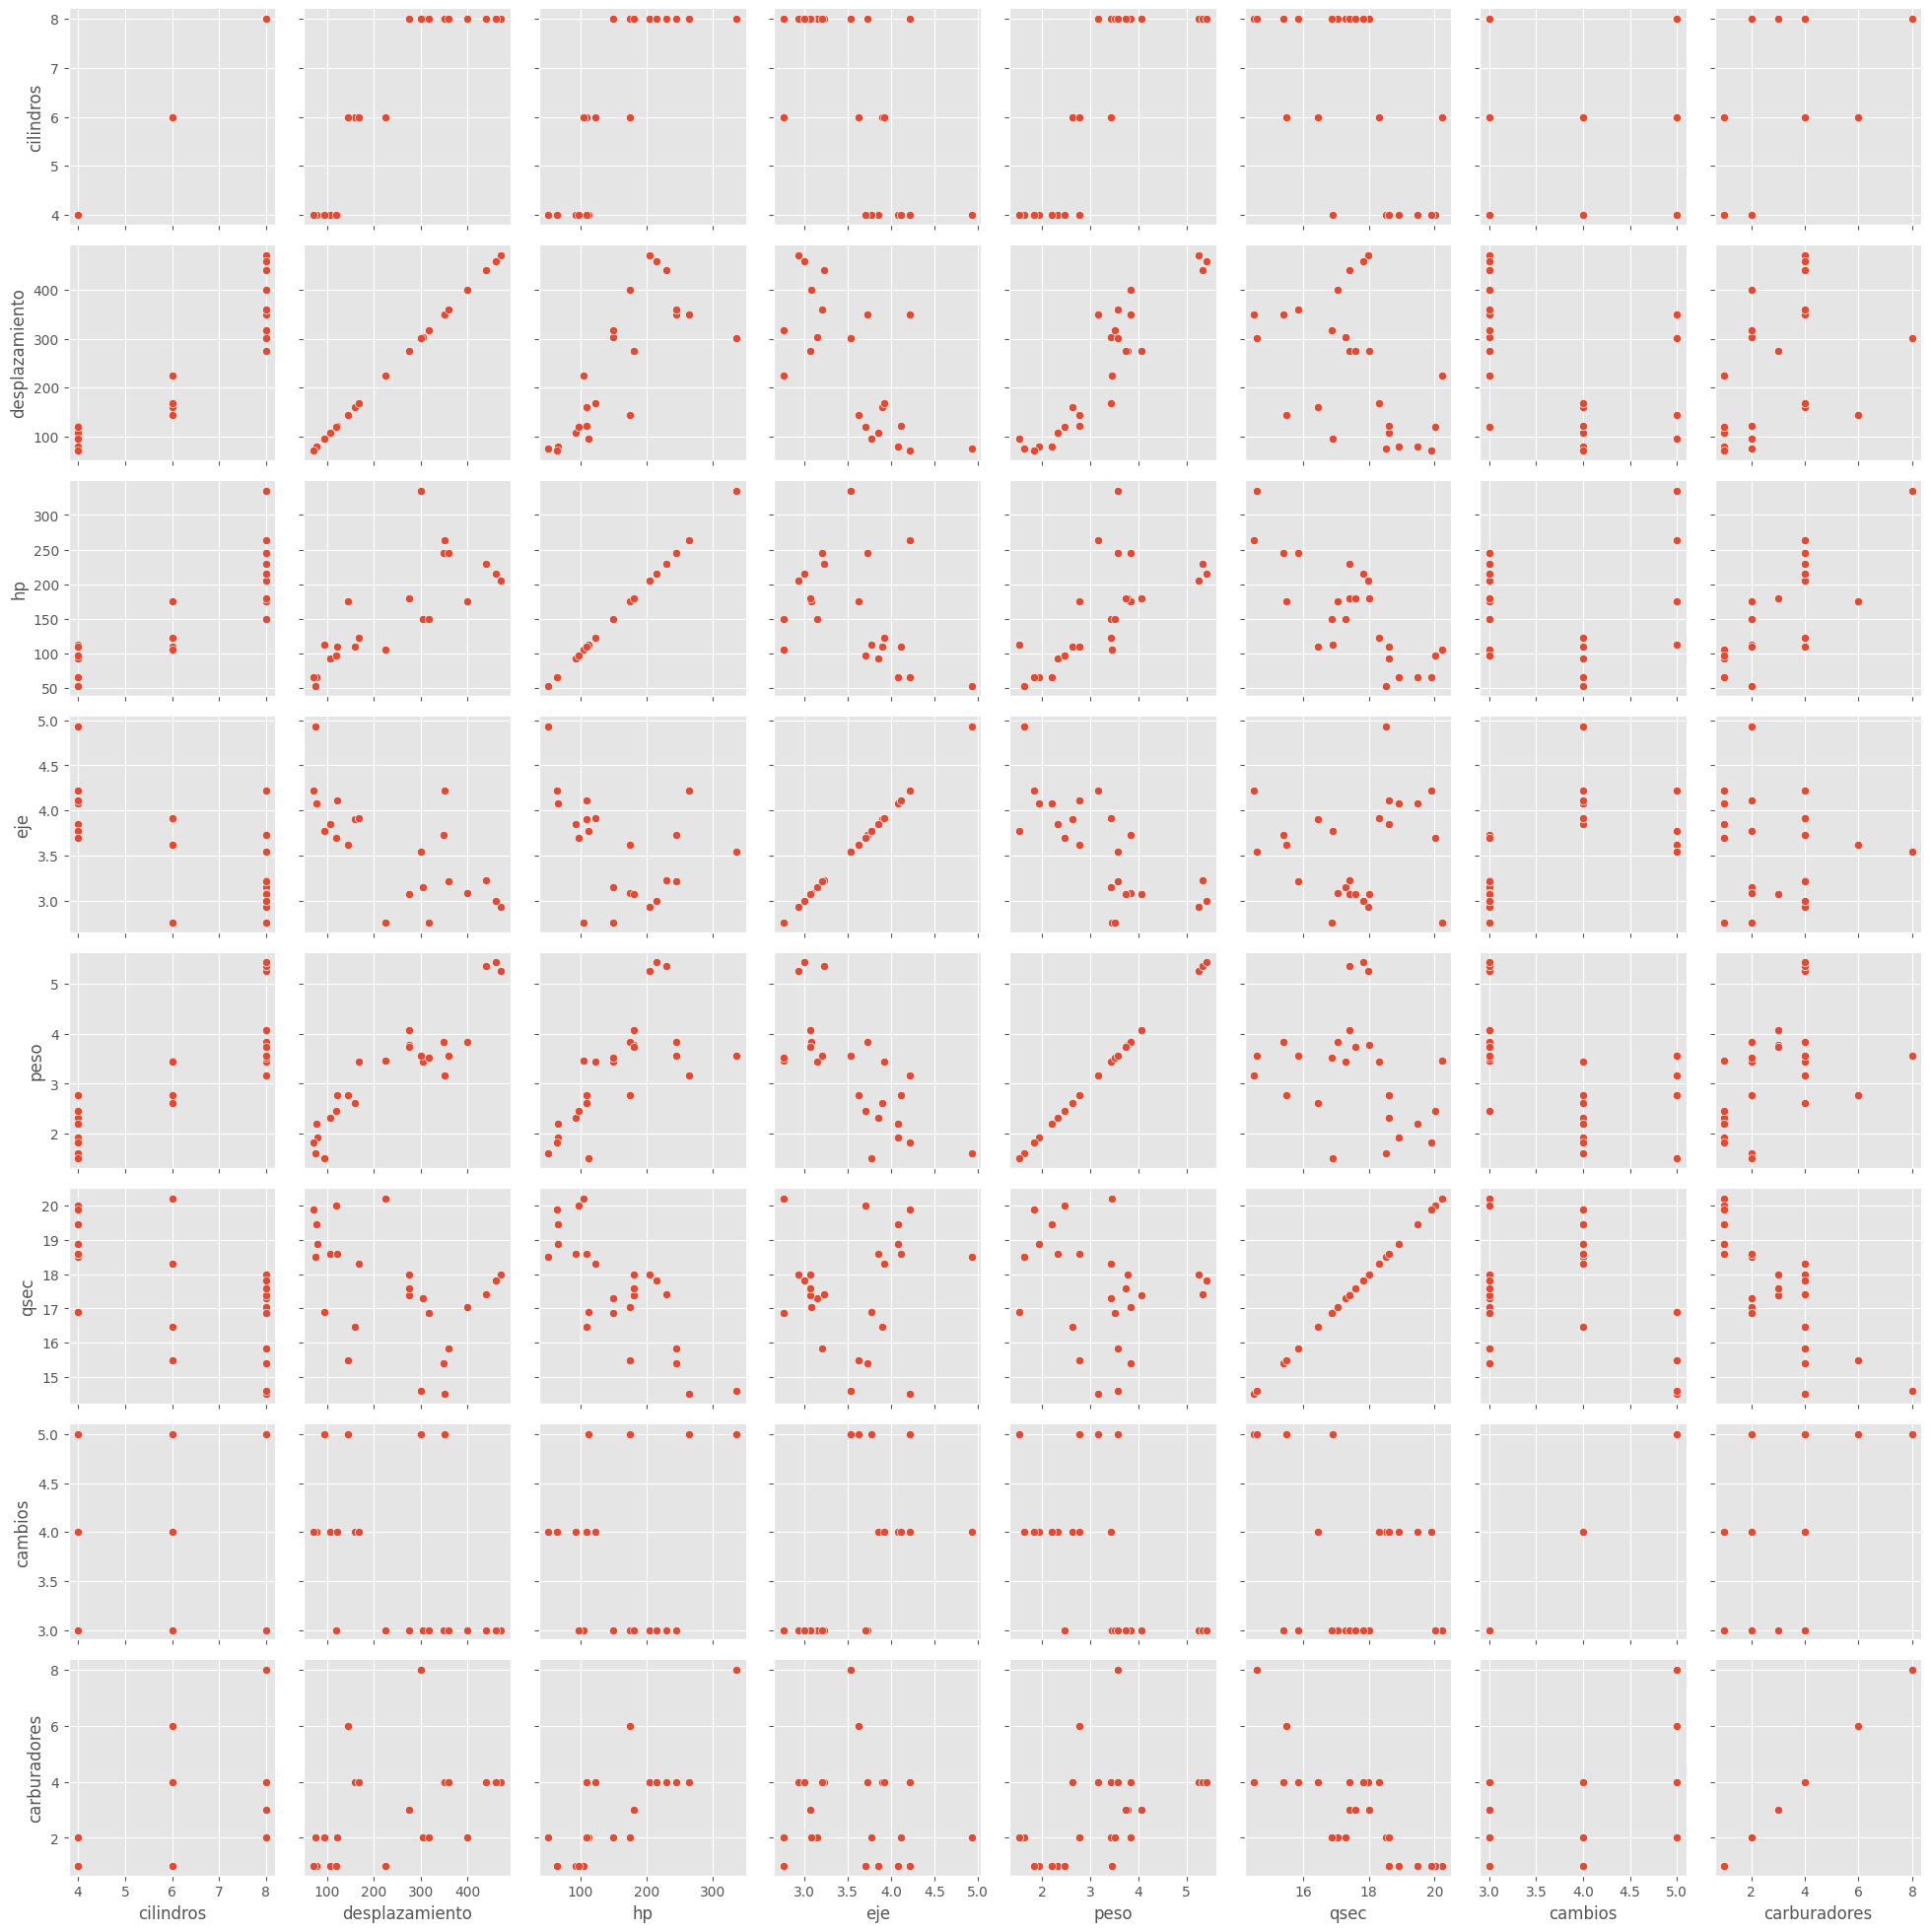

In [13]:
G = sns.PairGrid(X_train_pca)
G.map(sns.scatterplot)

# Exploración inicial
---

Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

En caso no se hiciera, las variables ``desplazamiento`` y ``hp`` tendrían mucha influencia al generar loc Componentes Principales.

In [14]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
X_train_pca.mean(axis=0)

----------------------
Media de cada variable
----------------------


cilindros           6.40000
desplazamiento    241.18800
hp                157.12000
eje                 3.56000
peso                3.26008
qsec               17.56720
cambios             3.64000
carburadores        2.92000
dtype: float64

In [15]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
X_train_pca.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


cilindros             3.333333
desplazamiento    17486.033600
hp                 5250.276667
eje                   0.306583
peso                  1.177116
qsec                  2.522204
cambios               0.573333
carburadores          2.993333
dtype: float64

Si se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, lograremos homogenizar las variables sin unidades y así las componentes serán más limpias y explicables.

# Modelo PCA
---

La clase ```sklearn.decomposition.PCA``` incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento ````n_components```` determina el número de componentes calculados. Si se indica ``None``, se calculan todas las posibles ``(min(filas, columnas) - 1)``.

Por defecto, ``PCA()`` centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un ``StandardScaler()`` y un ``PCA()`` dentro de un ``pipeline``.

In [16]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_train_pca)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Interpretación
---

Una vez entrenado el objeto ``PCA``, puede accederse a toda la información de las componentes creadas.

``components_`` contiene el valor de los _loadings  ϕ_ que definen cada componente (eigenvector). Las filas se corresponden con las componentes principales (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [17]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_train_pca.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
)

,cilindros,desplazamiento,hp,eje,peso,qsec,cambios,carburadores
PC1,0.435681,0.427316,0.405286,-0.321407,0.403031,-0.278607,-0.175711,0.298486
PC2,-0.032831,-0.119089,0.244647,0.349430,-0.206294,-0.475653,0.583157,0.440354
PC3,-0.248626,0.104154,0.042105,0.444978,0.534828,0.519861,0.024237,0.413128
PC4,0.163419,0.304088,0.063317,0.737799,-0.049316,-0.266204,-0.360481,-0.359478
PC5,-0.150430,0.471934,0.143934,-0.082026,0.189389,0.095143,0.627173,-0.537529
PC6,-0.318203,-0.119213,0.837330,-0.044983,-0.280015,0.217155,-0.215699,-0.096433
PC7,0.771754,-0.206489,0.148102,0.147043,-0.158094,0.480180,0.240100,-0.070619
PC8,-0.033107,0.648329,-0.162286,-0.043243,-0.606024,0.261211,-0.031612,0.337449


In [18]:
# averiguar las columnas del DataFrame
#X_train_pca.columns

Analizar con detalle el vector de _loadings_ que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

$$PC1=0.435681\times cilindros+0.427316\times desplazamiento+0.405286\times hp-0.321407\times ejes+0.403031\times peso$$
$$-0.278607\times qsec-0.175711\times cambios+0.298486\times carburadores$$

Los pesos asignados en la __primera componente__ a las variables _cilindros, desplazamiento, peso_  y _hp_ son aproximadamente iguales entre ellos y superiores al asignado a _los demás_. Esto significa que la primera componente recoge mayoritariamente la información correspondiente a la __potencia__. En la __segunda componente__, son las variables _cambios, carburadores_ y _eje_ las que tienen, con diferencia, mayor peso, por lo que se corresponde principalmente con __nivel de tecnología mecánica__. Si bien en este ejemplo la interpretación de las componentes es bastante clara, no en todos los casos ocurre lo mismo, sobre todo a medida que aumenta el número de variables.

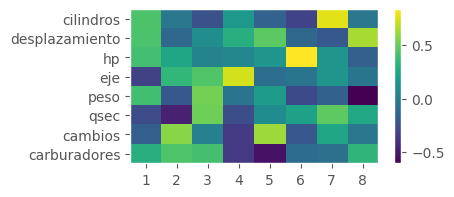

In [19]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X_train_pca.columns)), X_train_pca.columns)
plt.xticks(range(len(X_train_pca.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [20]:
# Otra manera de ver la influencia de las variables originales en las componentes (2Dim)
g = pd.DataFrame(
    data    = modelo_pca.components_.T,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], 
    index   = X_train_pca.columns 
)

In [21]:
g

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
cilindros,0.435681,-0.032831,-0.248626,0.163419,-0.150430,-0.318203,0.771754,-0.033107
desplazamiento,0.427316,-0.119089,0.104154,0.304088,0.471934,-0.119213,-0.206489,0.648329
hp,0.405286,0.244647,0.042105,0.063317,0.143934,0.837330,0.148102,-0.162286
eje,-0.321407,0.349430,0.444978,0.737799,-0.082026,-0.044983,0.147043,-0.043243
peso,0.403031,-0.206294,0.534828,-0.049316,0.189389,-0.280015,-0.158094,-0.606024
qsec,-0.278607,-0.475653,0.519861,-0.266204,0.095143,0.217155,0.480180,0.261211
cambios,-0.175711,0.583157,0.024237,-0.360481,0.627173,-0.215699,0.240100,-0.031612
carburadores,0.298486,0.440354,0.413128,-0.359478,-0.537529,-0.096433,-0.070619,0.337449


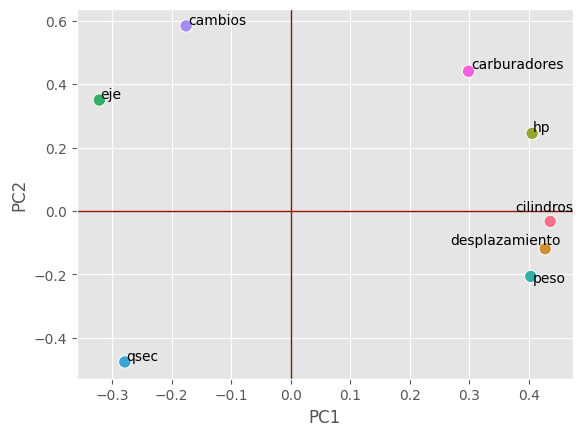

In [22]:
x = g['PC1']
y = g['PC2']
labels = g.index

plt.axhline(0, color = 'xkcd:brick red', lw = 1)
plt.axvline(0, color = 'xkcd:brick red', lw = 1)

sns.scatterplot(x = x, y = y, hue = labels, s = 80, legend = False)
texts = [plt.text(x_pos, y_pos, f'{l}') for (x_pos, y_pos, l) in zip(x, y, labels)]
adjT.adjust_text(texts);

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos __explained_variance___ y __explained_variance_ratio___ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[61.01163567 27.28531007  4.03242749  3.74322562  1.93302403  1.0869719
  0.6483951   0.25901012]


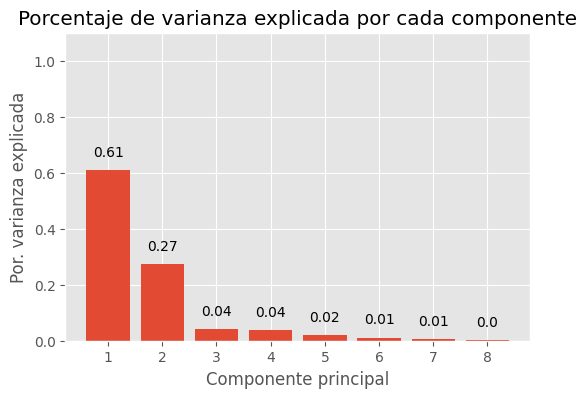

In [23]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_*100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_train_pca.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [24]:
#autovalor
modelo_pca.explained_variance_

array([5.08430297, 2.27377584, 0.33603562, 0.31193547, 0.16108534,
       0.09058099, 0.05403292, 0.02158418])

En este caso, la primera componente explica el 61.01% de la varianza observada en los datos y la segunda el 27.28%. Todas la otras componentes no superan por separado el 4% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[ 61.01163567  88.29694574  92.32937323  96.07259885  98.00562288
  99.09259478  99.74098988 100.        ]


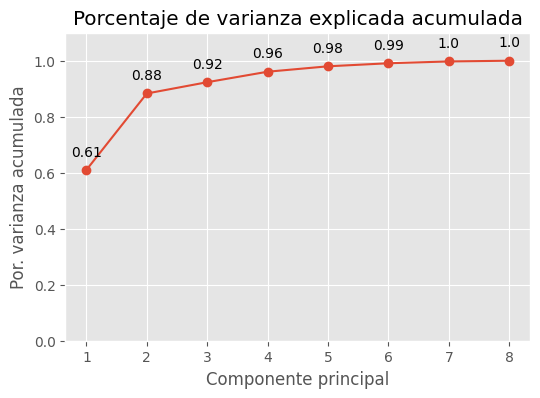

In [25]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum*100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X_train_pca.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train_pca.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 88% de la varianza observada.

# Transformación
---

Una vez entrenado el modelo, con el método ``transform()`` se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [26]:
X_train_pca.head(8)

,cilindros,desplazamiento,hp,eje,peso,qsec,cambios,carburadores
modelo,,,,,,,,
Camaro Z28,8,350.0,245,3.73,3.840,15.41,3,4
Cadillac Fleetwood,8,472.0,205,2.93,5.250,17.98,3,4
Merc 450SLC,8,275.8,180,3.07,3.780,18.00,3,3
Honda Civic,4,75.7,52,4.93,1.615,18.52,4,2
Ford Pantera L,8,351.0,264,4.22,3.170,14.50,5,4
Mazda RX4,6,160.0,110,3.90,2.620,16.46,4,4
Datsun 710,4,108.0,93,3.85,2.320,18.61,4,1
Ferrari Dino,6,145.0,175,3.62,2.770,15.50,5,6


__Proyección Ortogonal de las Observaciones de ENTRENAMIENTO__; esto nos servirá para conocer las rotaciones que han tenido cada una de variables y que se han convertido en funcion lineal Componentes

In [27]:
# Proyección ortogonal de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=X_train_pca)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
    index   = X_train_pca.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
modelo,,,,,,,,
Camaro Z28,2.097376,0.607302,-0.129981,1.135213,-0.497818,0.308485,-0.257784,-0.150024
Cadillac Fleetwood,2.819785,-1.217172,0.856200,-0.207175,0.394772,-0.221963,-0.169122,0.243250
Merc 450SLC,1.210044,-1.013422,-0.178129,-0.222729,-0.335316,0.098995,0.395812,-0.050212
Honda Civic,-3.583628,0.788310,0.540088,1.095236,-0.459993,-0.260251,0.073876,0.246724
Ford Pantera L,1.354070,2.967737,-0.291772,1.035858,0.985997,-0.040969,0.379163,-0.083527


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables.
Puede calcularse de forma manual:

In [28]:
# Proyección ortogonal de las observaciones de entrenamiento --> método matricial
# ==============================================================================
proyecciones = np.dot(modelo_pca.components_, scale(X_train_pca).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
proyecciones = proyecciones.transpose().set_index(X_train_pca.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
modelo,,,,,,,,
Camaro Z28,2.097376,0.607302,-0.129981,1.135213,-0.497818,0.308485,-0.257784,-0.150024
Cadillac Fleetwood,2.819785,-1.217172,0.856200,-0.207175,0.394772,-0.221963,-0.169122,0.243250
Merc 450SLC,1.210044,-1.013422,-0.178129,-0.222729,-0.335316,0.098995,0.395812,-0.050212
Honda Civic,-3.583628,0.788310,0.540088,1.095236,-0.459993,-0.260251,0.073876,0.246724
Ford Pantera L,1.354070,2.967737,-0.291772,1.035858,0.985997,-0.040969,0.379163,-0.083527


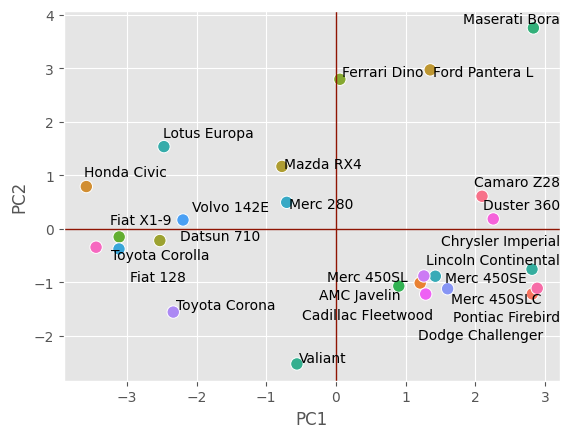

In [29]:
x = proyecciones['PC1']
y = proyecciones['PC2']
labels = proyecciones.index

plt.axhline(0, color = 'xkcd:brick red', lw = 1)
plt.axvline(0, color = 'xkcd:brick red', lw = 1)

sns.scatterplot(x = x, y = y, hue = labels, s = 80, legend = False)
texts = [plt.text(x_pos, y_pos, f'{l}') for (x_pos, y_pos, l) in zip(x, y, labels)]
adjT.adjust_text(texts);

__Proyección Ortogonal de las Observaciones de TEST__; esto nos servirá para conocer las rotaciones que tendrán los dastos de test y que servirán para el verificar un modelo de regresión

In [30]:
# Proyección ortogonal de las observaciones de test
# ==============================================================================
proyecciones_test = pca_pipe.transform(X=X_test_pca)
proyecciones_test = pd.DataFrame(
    proyecciones_test,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
    index   = X_test_pca.index
)
proyecciones_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
modelo,,,,,,,,
Merc 240D,-2.225598,-0.799220,0.872886,-0.741824,0.377476,-0.313155,-0.132035,0.028534
Merc 280C,-0.813699,0.310481,1.082241,-0.390402,-0.282593,-0.320907,0.427151,0.009284
Hornet Sportabout,1.282288,-0.950741,-0.789964,0.474717,0.145749,-0.034400,0.062681,0.206431
Mazda RX4 Wag,-0.778732,0.944107,0.139670,-0.099199,-0.549219,-0.579116,-0.089394,0.009076
Porsche 914-2,-2.629604,1.800156,-0.122273,0.355819,0.684754,-0.482880,-0.367442,-0.226821


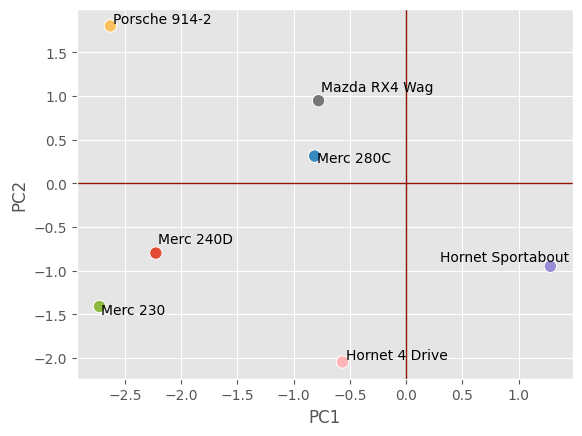

In [31]:
x = proyecciones_test['PC1']
y = proyecciones_test['PC2']
labels = proyecciones_test.index

plt.axhline(0, color = 'xkcd:brick red', lw = 1)
plt.axvline(0, color = 'xkcd:brick red', lw = 1)

sns.scatterplot(x = x, y = y, hue = labels, s = 80, legend = False)
texts = [plt.text(x_pos, y_pos, f'{l}') for (x_pos, y_pos, l) in zip(x, y, labels)]
adjT.adjust_text(texts);

# Reconstrucción
---

Puede revertirse la transformación y reconstruir el valor inicial con el método ``inverse_transform()``. __Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes__.

In [32]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = X_train_pca.columns,
                    index   = X_train_pca.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(X_train_pca.head())

------------------
Valores reconstruidos
------------------


,cilindros,desplazamiento,hp,eje,peso,qsec,cambios,carburadores
modelo,,,,,,,,
Camaro Z28,8.0,350.0,245.0,3.73,3.840,15.41,3.0,4.0
Cadillac Fleetwood,8.0,472.0,205.0,2.93,5.250,17.98,3.0,4.0
Merc 450SLC,8.0,275.8,180.0,3.07,3.780,18.00,3.0,3.0
Honda Civic,4.0,75.7,52.0,4.93,1.615,18.52,4.0,2.0
Ford Pantera L,8.0,351.0,264.0,4.22,3.170,14.50,5.0,4.0


---------------------
Valores originales
---------------------


,cilindros,desplazamiento,hp,eje,peso,qsec,cambios,carburadores
modelo,,,,,,,,
Camaro Z28,8,350.0,245,3.73,3.840,15.41,3,4
Cadillac Fleetwood,8,472.0,205,2.93,5.250,17.98,3,4
Merc 450SLC,8,275.8,180,3.07,3.780,18.00,3,3
Honda Civic,4,75.7,52,4.93,1.615,18.52,4,2
Ford Pantera L,8,351.0,264,4.22,3.170,14.50,5,4


# Modelos
Se ajustan dos modelos lineales, uno con todos los predictores (incluyendo las dos variables categóricas _tipomotor y transmision_) y otro con solo __dos__ de las componentes obtenidas por PCA (incluyendo, también, las dos variables categóricas _tipomotor y transmision_), con el objetivo de identificar cuál de ellos es capaz de predecir mejor el rendimiento de _millas por galón (mpg)_.

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: uno de entrenamiento (80%) y otro de test (20%).


## Probemos la regresión lineal múltiple "con todas las variables numéricas"


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [35]:
# Coeficientes del modelo
#params = np.append(modelo.intercept_, modelo.coef_)
#params

In [36]:
#modelo.feature_names_in_

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats

lm = LinearRegression()
lm.fit(X_train, y_train)
params = np.append(lm.intercept_, lm.coef_)

predictions = lm.predict(X_train)

ones = pd.DataFrame({"Constant": np.ones(len(X_train)), "modelo": X_train.index}).set_index("modelo")
newX = pd.concat([ones, X_train], axis = 1)
newX = newX.astype(float)

MSE = (sum((y_train - predictions) ** 2)) / (len(newX) - len(newX.columns))

var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())

sd_b = np.sqrt(var_b)

ts_b = params / sd_b

p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - len(newX.columns)))) for i in ts_b]

sd_b = np.round(sd_b, 3)
ts_b = np.round(ts_b, 3)
p_values = np.round(p_values, 3)
params = np.round(params, 4)
features = newX.columns

myDF3 = pd.DataFrame({
    "Features": features,
    "Coefficients": params,
    "Standard Errors": sd_b,
    "t values": ts_b,
    "Probabilities": p_values
})

display(myDF3)


,Features,Coefficients,Standard Errors,t values,Probabilities
0,Constant,-16.4585,32.931,-0.500,0.625
1,cilindros,-0.0816,1.639,-0.050,0.961
2,desplazamiento,0.0130,0.023,0.576,0.573
3,hp,-0.0120,0.030,-0.400,0.695
4,eje,1.8887,2.168,0.871,0.398
5,peso,-4.2398,2.566,-1.652,0.121
6,qsec,2.0391,1.442,1.414,0.179
7,tipomotor,-2.5452,5.394,-0.472,0.644
8,transmision,0.9660,4.311,0.224,0.826
9,cambios,2.0805,2.964,0.702,0.494


In [38]:
# Predicciones train
# ==============================================================================
predicciones_train = modelo.predict(X=X_train)
predicciones_train = predicciones_train.flatten()

# Error de train del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones_train,
            squared = False
           )
print("")
print(f"El error (rmse) de train es: {rmse_ols}")


El error (rmse) de train es: 2.2632412941307147


In [39]:
# Predicciones test
# ==============================================================================
predicciones_test = modelo.predict(X=X_test)
predicciones_test = predicciones_test.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones_test,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 3.180380717710472


In [40]:
predicciones_test = pd.DataFrame({"predicciones": predicciones_test, "modelo": X_test.index}).set_index("modelo")
predicciones_test

,predicciones
modelo,
Merc 240D,24.147712
Merc 280C,20.425836
Hornet Sportabout,17.543103
Mazda RX4 Wag,22.518338
Porsche 914-2,28.170059
Merc 230,30.193287
Hornet 4 Drive,20.488148


In [41]:
y_test

modelo
Merc 240D            24.4
Merc 280C            17.8
Hornet Sportabout    18.7
Mazda RX4 Wag        21.0
Porsche 914-2        26.0
Merc 230             22.8
Hornet 4 Drive       21.4
Name: mpg, dtype: float64

## Probemos la regresión lineal múltiple "con las componentes"

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [43]:
# Probaremos 3 componentes ya que completan más del 90% de información.
X_train_componentes = pd.concat([proyecciones[['PC1','PC2','PC3']], X_train[['transmision','tipomotor']]], axis = 1)
X_test_componentes = pd.concat([proyecciones_test[['PC1','PC2','PC3']], X_test[['transmision','tipomotor']]], axis = 1)

In [44]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo_componentes = LinearRegression()
modelo_componentes.fit(X = X_train_componentes, y = y_train)

LinearRegression()

In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats

lm = LinearRegression()
lm.fit(X_train_componentes, y_train)
params = np.append(lm.intercept_, lm.coef_)

predictions = lm.predict(X_train_componentes)

ones = pd.DataFrame({"Constant": np.ones(len(X_train_componentes)), "modelo": X_train_componentes.index}).set_index("modelo")
newX = pd.concat([ones, X_train_componentes], axis = 1)
newX = newX.astype(float)

MSE = (sum((y_train - predictions) ** 2)) / (len(newX) - len(newX.columns))

var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())

sd_b = np.sqrt(var_b)

ts_b = params / sd_b

p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - len(newX.columns)))) for i in ts_b]

sd_b = np.round(sd_b, 3)
ts_b = np.round(ts_b, 3)
p_values = np.round(p_values, 3)
params = np.round(params, 4)
features = newX.columns

myDF3 = pd.DataFrame({
    "Features": features,
    "Coefficients": params,
    "Standard Errors": sd_b,
    "t values": ts_b,
    "Probabilities": p_values
})

display(myDF3)

,Features,Coefficients,Standard Errors,t values,Probabilities
0,Constant,19.0737,2.032,9.386,0.000
1,PC1,-2.5709,0.839,-3.063,0.006
2,PC2,0.0015,0.698,0.002,0.998
3,PC3,-0.4858,1.131,-0.430,0.672
4,transmision,2.1093,2.761,0.764,0.454
5,tipomotor,-0.9246,3.038,-0.304,0.764


In [46]:
# Predicciones train
# ==============================================================================
predicciones_train_componentes = modelo_componentes.predict(X=X_train_componentes)
predicciones_train_componentes = predicciones_train_componentes.flatten()

# Error de train del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones_train_componentes,
            squared = False
           )
print("")
print(f"El error (rmse) de train es: {rmse_ols}")


El error (rmse) de train es: 2.438889168645788


In [47]:
# Predicciones test
# ==============================================================================
predicciones_test_componentes = modelo_componentes.predict(X=X_test_componentes)
predicciones_test_componentes = predicciones_test_componentes.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones_test_componentes,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 1.8622170508429


In [48]:
predicciones_test_componentes = pd.DataFrame({"predicciones": predicciones_test_componentes, "modelo": X_test_componentes.index}).set_index("modelo")
predicciones_test_componentes

,predicciones
modelo,
Merc 240D,23.445828
Merc 280C,19.715863
Hornet Sportabout,16.159383
Mazda RX4 Wag,23.118684
Porsche 914-2,28.005669
Merc 230,24.175168
Hornet 4 Drive,19.715767


In [50]:
y_test

modelo
Merc 240D            24.4
Merc 280C            17.8
Hornet Sportabout    18.7
Mazda RX4 Wag        21.0
Porsche 914-2        26.0
Merc 230             22.8
Hornet 4 Drive       21.4
Name: mpg, dtype: float64